<a id='top'></a>

# Golden ID of Player and Team Football Datasets
##### Notebook to join the scraped player performance dataset from [FBref](https://fbref.com/en/) (provided by [StatsBomb](https://statsbomb.com/)), the [TransferMarkt](https://www.transfermarkt.co.uk/) estimated player values and [transfer](https://github.com/ewenme/transfers) datasets, and player salaries dataset from [Capology](https://www.capology.com/), through the [record-linkage](https://pypi.org/project/recordlinkage/) library, to create one, unified source of information, that can be used for for further analysis of players performance statistics and financial valuations, to be used as part of a transfer model.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 01/09/2020<br>
Notebook last updated: 03/08/2021

![title](../../img/logos/fbref-logo-banner.png)

![title](../../img/logos/stats-bomb-logo.png)

![title](../../img/logos/transfermarkt-logo-banner.png)

![title](../../img/logos/capology-logo.jpeg)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook joins datasets scraped from [FBref.com](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/) using a [Python webscraper](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902), and [TransferMarkt](https://www.transfermarkt.co.uk/) using the [Tyrone Mings web scraper](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://twitter.com/FC_rstats), as well as transfer datasets from TransferMarkt and player salary datasets from Capology, through [record-linkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used to create a model of player valuation. This landed data is then manipulated as DataFrames using [pandas](http://pandas.pydata.org/).

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Teams](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      2.    [Outfielder Players](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br>
      3.    [Goalkeepers](#section3.4)<br>
            1.    [Data Dictionary](#section3.4.1)<br>
            2.    [Creating the DataFrame](#section3.4.2)<br>
            3.    [Initial Data Handling](#section3.4.3)<br>
            4.    [Export the Raw DataFrame](#section3.4.4)<br> 
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Teams](#section4.2)<br>
            1.    [Columns of Interest](#section4.2.1)<br>
            2.    [String Cleaning](#section4.2.2)<br>
            3.    [Converting Data Types](#section4.2.3)<br>
            4.    [Export the Engineered DataFrame](#section4.2.4)<br>
      3.    [Outfielder Players](#section4.3)<br>
            1.    [Columns of Interest](#section4.3.1)<br>
            2.    [String Cleaning](#section4.3.2)<br>
            3.    [Converting Data Types](#section4.3.3)<br>
            4.    [Export the Engineered DataFrame](#section4.3.4)<br>
      4.    [Goalkeepers](#section4.4)<br>
            1.    [Columns of Interest](#section4.4.1)<br>
            2.    [String Cleaning](#section4.4.2)<br>
            3.    [Converting Data Types](#section4.4.3)<br>
            4.    [Export the Engineered DataFrame](#section4.4.4)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>
This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`RecordLinkage`](https://pypi.org/project/recordlinkage/) for joining of fuzzy datasets; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

In [4]:
# Define season to join

## Assign season to variable
season = '2020'    # '2020' for the 20/21 season

## Create 'Full Season' and 'Short Season' strings

### Full season
full_season_string = str(int(season)) + '/' + str(int(season) + 1)

### Short season
short_season_string = str((str(int(season))[-2:]) + (str(int(season) + 1)[-2:]))

### Short season
season_filter = str((str(int(season))[-2:]) + '/' + (str(int(season) + 1)[-2:]))

### Define Data Paths

In [5]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
data_dir_capology = os.path.join(base_dir, 'data', 'capology')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [6]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook matches disparate datasets from [FBref](https://fbref.com/en/) (provided by [StatsBomb](https://statsbomb.com/)), and [TransferMarkt](https://www.transfermarkt.co.uk/), and [Capology](https://www.capology.com/), using [RecordLinkage](https://pypi.org/project/recordlinkage/) and [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames.

Depending on the dataset, the data is joined on a player level or team level. This is reflecting in two output files - for players and teams.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>
The datasets include:
- ...
- ...
- ...
- ...

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Read in Data</a>

#### Player Datasets

In [63]:
## Player datasets
df_fbref_players = pd.read_csv(data_dir + '/export/fbref_players_big5_latest.csv')
df_tm_valuations = pd.read_csv(data_dir + '/export/tm_bio_status_players_big5_latest.csv')
df_tm_transfers = pd.read_csv(data_dir + '/export/tm_transfers_big5_latest.csv')
df_capology = pd.read_csv(data_dir + '/export/capology_big5_teams_latest.csv')

#### Team Datasets

In [64]:
## Team datasets
df_fbref_teams = pd.read_csv(data_dir + '/export/fbref_teams_big5_latest.csv')
df_elo = pd.read_csv(data_dir + '/export/elo_latest.csv')

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Initial Data Handling</a>

### Player Datasets

#### FBref Players

In [9]:
df_fbref_players.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,nationality_code,nationality_cleaned,position_grouped,outfielder_goalkeeper,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,28.0,25.0,2184.0,5.0,1.0,0.0,0.0,7.0,0.0,0.21,0.04,0.25,0.21,0.25,3.1,3.1,1.5,0.13,0.06,0.19,0.13,0.19,24.3,33.0,12.0,4.0,36.4,1.36,0.49,0.15,0.42,0.09,1.9,1.9,845.0,1116.0,75.7,15182.0,7109.0,363.0,411.0,88.3,377.0,471.0,80.0,88.0,183.0,48.1,-0.5,17.0,58.0,28.0,7.0,101.0,895.0,221.0,21.0,0.0,183.0,21.0,42.0,11.0,0.0,1.0,0.0,682.0,131.0,303.0,717.0,175.0,30.0,189.0,4.0,3.0,24.0,19.0,37.0,41.0,1.69,23.0,11.0,4.0,1.0,1.0,3.0,0.12,2.0,0.0,1.0,0.0,0.0,0.0,48.0,30.0,33.0,13.0,2.0,21.0,38.0,55.3,17.0,253.0,78.0,30.8,159.0,71.0,23.0,36.0,5.0,0.0,31.0,36.0,56.0,2.0,1369.0,83.0,448.0,578.0,437.0,39.0,1148.0,17.0,26.0,65.4,20.0,0.0,767.0,4832.0,2651.0,765.0,709.0,92.7,23.0,17.0,0.0,18.0,10.0,3.0,0.0,0.0,0.0,225.0,2.0,6.0,25.0,17/18,Crystal Palace,Premier League,England,patrick van aanholt,patrick,aanholt,p,england,NED,Netherlands,Defender,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [10]:
df_fbref_players.shape

(11262, 205)

#### TM Valuations
Player bio and status data

In [11]:
df_tm_valuations.head()

,tm_id,player_name,birth_day,birth_month,birth_year,pob,cob,dob,position,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,position_code,position_grouped,outfielder_goalkeeper,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
0,497291,nicolás domínguez,28.0,6.0,1998.0,Haedo,Argentina,1998-06-28,midfield - Central Midfield,179.0,right,Italy,2020/2021,bologna fc 1909,italy,10000000.0,2019-08-30,2024-06-30,NaN,NaN,NaN,NaN,M Sab,nicolas dominguez,nicolas,dominguez,n,italy,CM,Midfielder,Outfielder,22.0,21.0,1.0,3.0,8900000.0
1,457221,lucas robertone,18.0,3.0,1997.0,Concordia,Argentina,1997-03-18,midfield - Central Midfield,173.0,right,Italy,2020/2021,ud almería,spain,5500000.0,2020-10-01,2025-06-30,Obligation to buy with conditions,NaN,NaN,NaN,Relatives,lucas robertone,lucas,robertone,l,spain,CM,Midfielder,Outfielder,23.0,23.0,0.0,4.0,4895000.0
2,401521,braian cufré,15.0,12.0,1996.0,Mar de Plata,Argentina,1996-12-15,Defender - Left-Back,179.0,left,NaN,2020/2021,rcd mallorca,spain,4000000.0,2020-09-28,2024-06-30,Obligation to buy with conditions,NaN,NaN,NaN,TARGET4SPORT,braian cufre,braian,cufre,b,spain,LB,Defender,Outfielder,24.0,23.0,0.0,3.0,3560000.0
3,323872,andrés cubas,22.0,5.0,1996.0,Aristóbulo del Valle,Argentina,1996-05-22,midfield - Defensive Midfield,166.0,right,Argentina,2020/2021,nîmes olympique,france,4000000.0,2020-07-17,2024-06-30,NaN,NaN,NaN,NaN,Eleven Talent Group,andres cubas,andres,cubas,a,france,CDM,Midfielder,Outfielder,24.0,24.0,0.0,3.0,3560000.0
4,474800,facundo medina,28.0,5.0,1999.0,Buenos Aires,Argentina,1999-05-28,Defender - Centre-Back,184.0,left,NaN,2020/2021,rc lens,france,8000000.0,2020-07-02,2024-06-30,NaN,NaN,NaN,NaN,Dodici,facundo medina,facundo,medina,f,france,CB,Defender,Outfielder,21.0,21.0,0.0,3.0,7120000.0


In [12]:
df_tm_valuations.shape

(7284, 36)

#### TM Transfers
Player recorded transfer data

In [13]:
df_tm_transfers.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,1. FC Köln,Adrian Spyrka,24.0,Central Midfield,Stuttg. Kickers,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
1,1. FC Köln,Andrzej Kobylanski,22.0,Left Midfield,Siarka T.,£270Th.,in,Winter,0.270,1 Bundesliga,1992,1992/1993
2,1. FC Köln,Andrzej Rudy,26.0,Attacking Midfield,Bröndby IF,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
3,1. FC Köln,Carsten Keuler,20.0,Centre-Back,1.FC Köln II,-,in,Summer,0.000,1 Bundesliga,1992,1992/1993
4,1. FC Köln,Dirk Lehmann,20.0,Attacking Midfield,A. Aachen II,£14Th.,in,Summer,0.014,1 Bundesliga,1992,1992/1993


In [14]:
df_tm_transfers.shape

(77866, 12)

#### Capology
Player salaries

In [56]:
df_capology.head()

,player,season,league,team,position,outfielder_goalkeeper,age,country,weekly_gross_base_salary_gbp,annual_gross_base_salary_gbp,adj_current_gross_base_salary_gbp,estimated_gross_total_gbp,current_contract_status,current_contract_expiration,current_contract_length
0,Albian Ajeti,2016-2017,Bundesliga,Augsburg,Forward,Outfielder,19,Switzerland,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,Alexander Esswein,2016-2017,Bundesliga,Augsburg,Forward,Outfielder,26,Germany,12919.0,671795.0,696824.0,NaN,NaN,NaN,NaN
2,Alfred Finnbogason,2016-2017,Bundesliga,Augsburg,Forward,Outfielder,27,Iceland,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Andreas Luthe,2016-2017,Bundesliga,Augsburg,Goalkeeper,Goalkeeper,29,Germany,5939.0,308881.0,320389.0,NaN,NaN,NaN,NaN
4,Caiuby,2016-2017,Bundesliga,Augsburg,Forward,Outfielder,27,Brazil,12919.0,671795.0,696824.0,NaN,NaN,NaN,NaN


In [16]:
df_capology.shape

(21389, 15)

### Team Datasets

#### FBref Teams

In [17]:
df_fbref_teams.head()

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,league_name,league_country,Season
0,Arsenal,30.0,61.5,38.0,418.0,3420.0,73.0,61.0,4.0,5.0,0.0,0.0,1.92,1.61,3.53,1.82,3.42,63.1,59.3,45.8,1.66,1.21,2.87,1.56,2.77,38.0,38.0,3420.0,51.0,1.34,143.0,97.0,0.678,19.0,6.0,13.0,13.0,34.2,6.0,5.0,1.0,0.0,38.0,0.0,9.0,0.0,51.8,0.33,0.8,0.02,152.0,394.0,38.6,785.0,175.0,38.2,37.3,123.0,76.4,57.8,371.0,41.0,11.1,31.0,0.82,15.4,595.0,225.0,30.0,37.8,15.66,5.92,0.12,0.31,0.10,9.9,9.7,20134.0,24284.0,82.9,381241.0,119499.0,8101.0,9213.0,87.9,8936.0,10169.0,87.9,2697.0,4026.0,67.0,13.2,442.0,1754.0,505.0,67.0,1842.0,23018.0,1266.0,277.0,17.0,3483.0,623.0,455.0,203.0,17.0,13.0,7.0,18091.0,2194.0,3999.0,9481.0,12570.0,1108.0,575.0,261.0,80.0,363.0,499.0,533.0,961.0,25.29,748.0,47.0,56.0,49.0,52.0,124.0,3.26,92.0,7.0,5.0,11.0,7.0,0.0,580.0,356.0,291.0,204.0,85.0,171.0,509.0,33.6,338.0,4885.0,1526.0,31.2,1707.0,1993.0,1185.0,548.0,117.0,6.0,431.0,355.0,667.0,12.0,28595.0,2113.0,8080.0,13174.0,9258.0,1259.0,27364.0,332.0,521.0,63.7,373.0,9.0,19968.0,116546.0,59369.0,22444.0,20134.0,89.7,480.0,364.0,0.0,388.0,382.0,90.0,4.0,6.0,0.0,3889.0,352.0,371.0,48.7,Premier League,England,17/18
1,Bournemouth,22.0,47.8,38.0,418.0,3420.0,45.0,36.0,3

In [18]:
df_fbref_teams.shape

(392, 191)

#### ELO

In [19]:
df_elo.head()

,Rank,Club,Country,Level,Elo,From,To
0,1,Bayern,GER,1,2049.702148,2020-12-20,2021-01-03
1,2,Liverpool,ENG,1,1965.276245,2020-12-31,2021-01-04
2,3,Man City,ENG,1,1959.461792,2020-12-27,2021-01-03
3,4,Atletico,ESP,1,1909.688232,2020-12-31,2021-01-03
4,5,Barcelona,ESP,1,1903.787109,2020-12-31,2021-01-03


In [20]:
df_elo.shape

(626, 7)

---

<a id='section4'></a>

## <a id='#section4'>4. Fuzzy Match Datasets - Record Linkage</a>

<a id='section4.1'></a>

### <a id='#section4.1'>4.1. Introduction</a>
Now we have the player-level and team-level datasets, we are now read to merge them to form one dataset of identifiers, that can then be used join any two datasets together in future analysis.

We are required to join two data sets together that do not have a common unique identifier and are required to use a third-party Python library - [record linkage](https://pypi.org/project/recordlinkage/), installed using pip install recordlinkage. [record linkage](https://pypi.org/project/recordlinkage/) provides a simple interface to link records in or between data sources. 

<b>'Record linkage'</b> is the term used by statisticians, epidemiologists, and historians, among others, to describe the process of joining records from one data source with another that describe the same entity ([source](https://en.wikipedia.org/wiki/Record_linkage)).

Record linkage is necessary when joining different data sets based on entities that may or may not share a common identifier (e.g., database key, URI, National identification number), which may be due to differences in record shape, storage location, or curator style or preference. A data set that has undergone RL-oriented reconciliation may be referred to as being cross-linked. Record linkage is referred to as data linkage in many jurisdictions, but the two are the same process.

The toolkit provides most of the tools needed for record linkage and deduplication. The package contains indexing methods, functions to compare records and classifiers. The package is developed for research and the linking of small or medium sized files.

For a full guide on how to use record linkage, see the official documentation [here](https://recordlinkage.readthedocs.io/en/latest/) and also this worked example by [Chris Moffitt](https://twitter.com/chris1610) [here](https://pbpython.com/record-linking.html).

As part of the joining of the datasets, the FBref dataset will be used as the based, from which the other datasets will be joined.

### <a id='#section4.2'>4.2. Join the FBref and TM Valuation Datasets</a>
The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [135]:
## Define columns
cols_fbref_players = ['player',
                      'firstinitial_lower',
                      'firstname_lower',
                      'lastname_lower',
                     #'age',
                      'birth_year',
                      'nationality_cleaned',
                      'outfielder_goalkeeper',
                     ]

## Select columns of interest
df_fbref_players_select = df_fbref_players[cols_fbref_players]

# Drop duplicates
df_fbref_players_select = df_fbref_players_select.drop_duplicates()

# Display DataFrame
df_fbref_players_select.head()

,player,firstinitial_lower,firstname_lower,lastname_lower,birth_year,nationality_cleaned,outfielder_goalkeeper
0,Patrick van Aanholt,p,patrick,aanholt,1990,Netherlands,Outfielder
1,Rolando Aarons,r,rolando,aarons,1995,England,Outfielder
3,Ignazio Abate,i,ignazio,abate,1986,Italy,Outfielder
4,Aymen Abdennour,a,aymen,abdennour,1989,Tunisia,Outfielder
5,Aly Abeid,a,aly,abeid,1997,Mauritania,Outfielder


In [136]:
# Define columns
cols_tm_valuations = ['player_name',
                      'firstinitial_lower',
                      'firstname_lower',
                      'lastname_lower',
                     #'age',
                      'birth_year',
                      'cob',
                      'outfielder_goalkeeper',
                      'tm_id'
                     ]

# Select columns of interest
df_tm_valuations_select = df_tm_valuations[cols_tm_valuations]

# Drop duplicates
df_tm_valuations_select = df_tm_valuations_select.drop_duplicates()

# Display DataFrame
df_tm_valuations_select.head()

,player_name,firstinitial_lower,firstname_lower,lastname_lower,birth_year,cob,outfielder_goalkeeper,tm_id
0,nicolás domínguez,n,nicolas,dominguez,1998.0,Argentina,Outfielder,497291
1,lucas robertone,l,lucas,robertone,1997.0,Argentina,Outfielder,457221
2,braian cufré,b,braian,cufre,1996.0,Argentina,Outfielder,401521
3,andrés cubas,a,andres,cubas,1996.0,Argentina,Outfielder,323872
4,facundo medina,f,facundo,medina,1999.0,Argentina,Outfielder,474800


In [137]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year', 'outfielder_goalkeeper'], 
              right_on = ['firstinitial_lower', 'birth_year', 'outfielder_goalkeeper']
             )    # removed 'age' as they don't match in the two datasets

<Index>

The next step is to build up all the potential candidates to check:

In [138]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_players_select, df_tm_valuations_select)
print(len(candidates))

102555


Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [139]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name'
              )

compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name'
              )

features = compare.compute(candidates, df_fbref_players_select, df_tm_valuations_select)

View the potential candidates

In [140]:
# Record Linkage Step 4 - view the potential candidates
features

first_name  last_name
0     273          0.0        0.0
      818          0.0        0.0
      947          0.0        0.0
      952          0.0        0.0
      1001         0.0        0.0
...                ...        ...
10160 7164         0.0        0.0
10453 196          1.0        1.0
      7191         1.0        0.0
10489 3077         0.0        0.0
      4865         1.0        1.0

[102555 rows x 2 columns]

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [141]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

2.0     3111
1.0     8447
0.0    90997
dtype: int64

To only include high-quality matches, let’s just take all the records with 3 matches out of 3 and create a total score column:

In [142]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 2].reset_index()
potential_matches

,level_0,level_1,first_name,last_name
0,0,2165,1.0,1.0
1,292,273,1.0,1.0
2,1636,1153,1.0,1.0
3,4986,1137,1.0,1.0
4,263,5732,1.0,1.0
...,...,...,...,...
3106,10015,141,1.0,1.0
3107,10086,2431,1.0,1.0
3108,10160,2399,1.0,1.0
3109,10453,196,1.0,1.0


In [143]:
potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'last_name'].sum(axis=1)
#potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'nationality'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,Score
0,0,2165,1.0,1.0,2.0
1,292,273,1.0,1.0,2.0
2,1636,1153,1.0,1.0,2.0
3,4986,1137,1.0,1.0,2.0
4,263,5732,1.0,1.0,2.0
...,...,...,...,...,...
3106,10015,141,1.0,1.0,2.0
3107,10086,2431,1.0,1.0,2.0
3108,10160,2399,1.0,1.0,2.0
3109,10453,196,1.0,1.0,2.0


In [144]:
# Join the FBref Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(potential_matches, df_fbref_players_select, left_on='level_0', right_index=True, how='left')

# Join the TransferMarkt Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_merge, df_tm_valuations_select, left_on='level_1', right_index=True, how='left')

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [145]:
df_merge

,level_0,level_1,first_name,last_name,Score,player,firstinitial_lower_x,firstname_lower_x,lastname_lower_x,birth_year_x,nationality_cleaned,outfielder_goalkeeper_x,player_name,firstinitial_lower_y,firstname_lower_y,lastname_lower_y,birth_year_y,cob,outfielder_goalkeeper_y,tm_id
0,0,2165,1.0,1.0,2.0,Patrick van Aanholt,p,patrick,aanholt,1990,Netherlands,Outfielder,patrick van aanholt,p,patrick,aanholt,1990.0,Netherlands,Outfielder,52119
1,292,273,1.0,1.0,2.0,Pedro Bigas,p,pedro,bigas,1990,Spain,Outfielder,pedro bigas,p,pedro,bigas,1990.0,Spain,Outfielder,203043
2,1636,1153,1.0,1.0,2.0,Pedro Mendes,p,pedro,mendes,1990,Portugal,Outfielder,pedro mendes,p,pedro,mendes,1990.0,Switzerland,Outfielder,72857
3,4986,1137,1.0,1.0,2.0,Petar Škuletić,p,petar,skuletic,1990,Serbia,Outfielder,petar skuletic,p,petar,skuletic,1990.0,Jugoslawien (SFR),Outfielder,58295
4,263,5732,1.0,1.0,2.0,Ramy Bensebaini,r,ramy,bensebaini,1995,Algeria,Outfielder,ramy bensebaini,r,ramy,bensebaini,1995.0,Algeria,Outfielder,284732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,10015,141,1.0,1.0,2.0,Miguel Rodríguez,m,miguel,rodriguez,2003,Spain,Outfielder,miguel rodríguez,m,miguel,rodriguez,2003.0,Spain,Outfielder,634427
3107,10086,2431,1.0,1.0,2.0,Robert Sánchez,r,robert,sanchez,1997,Spain,Goalkeeper,robert sánchez,r,robert,sanchez,1997.0,Spain,Goalkeeper,403151
3108,10160,2399,1.0,1.0,2.0,Fábio Silva,f,fabio,silva,2002,Portugal,Outfielder,fábio silva,f,fabio,silva,2002.0,Portugal,Outfielder,505653
3109,10453,196,1.0,1.0,2.0,Rubén Yáñez,r,ruben,yanez,1993,Spain,Goalkeeper,rubén yáñez,r,ruben,yanez,1993.0,Spain,Goalkeeper,246335


In [148]:
df_merge.shape

(3111, 20)

In [149]:
# Select columns of interest
cols_merge = ['player',
              'player_name',
              'tm_id'
             ]

# Create more concise DataFrame using only columns of interest
df_merge_fbref_tm_select = df_merge[cols_merge]

# Sort columns
df_merge_fbref_tm_select = df_merge_fbref_tm_select.sort_values(by=['player'], ascending=[True])

# Drop duplicates
df_merge_fbref_tm_select = df_merge_fbref_tm_select.drop_duplicates()

# Rename columns
df_merge_fbref_tm_select = df_merge_fbref_tm_select.rename(columns={'player': 'player_name_fbref',
                                                                    'player_name': 'player_name_tm',
                                                                    'tm_id': 'id_tm'
                                                                   }
                                                          )

# Display DataFrame
df_merge_fbref_tm_select.head()

,player_name_fbref,player_name_tm,id_tm
2466,Aaron Connolly,aaron connolly,434207
18,Aaron Cresswell,aaron cresswell,92571
3008,Aaron Hickey,aaron hickey,591949
1015,Aaron Hunt,aaron hunt,4687
49,Aaron Leya Iseka,aaron leya iseka,289587


In [150]:
df_merge_fbref_tm_select.shape

(3110, 3)

In [152]:
df_fbref_players_select.shape

(4834, 7)

In [156]:
df_fbref_players_select.drop_duplicates().shape

(4834, 7)

### <a id='#section4.3'>4.3. Join the FBref Player and TM Transfer Datasets</a>

In [183]:
df_tm_transfers.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,1. FC Köln,Adrian Spyrka,24.0,Central Midfield,Stuttg. Kickers,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
1,1. FC Köln,Andrzej Kobylanski,22.0,Left Midfield,Siarka T.,£270Th.,in,Winter,0.270,1 Bundesliga,1992,1992/1993
2,1. FC Köln,Andrzej Rudy,26.0,Attacking Midfield,Bröndby IF,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
3,1. FC Köln,Carsten Keuler,20.0,Centre-Back,1.FC Köln II,-,in,Summer,0.000,1 Bundesliga,1992,1992/1993
4,1. FC Köln,Dirk Lehmann,20.0,Attacking Midfield,A. Aachen II,£14Th.,in,Summer,0.014,1 Bundesliga,1992,1992/1993


In [ ]:
# Quick bit of data engineering

## Remove accents and create lowercase name
df_tm_valuation['player_lower'] = (df_capology['player_name']
                                           .str.normalize('NFKD')
                                           .str.encode('ascii', errors='ignore')
                                           .str.decode('utf-8')
                                           .str.lower()
                                      )

## First Name Lower
df_tm_valuation['firstname_lower'] = df_tm_valuation['player_lower'].str.rsplit(' ', 0).str[0]

## Last Name Lower
df_tm_valuation['lastname_lower'] = df_tm_valuation['player_lower'].str.rsplit(' ', 1).str[-1]

## First Initial Lower
df_tm_valuation['firstinitial_lower'] = df_tm_valuation['player_lower'].astype(str).str[0]


# Define columns
cols_tm_valuation = ['player',
                     'firstinitial_lower',
                     'firstname_lower',
                     'lastname_lower',
                    #'age',
                    #'birth_year',
                     'country',
                     'outfielder_goalkeeper'
                    ]

# Select columns of interest
df_capology_select = df_capology[cols_capology]

"""
# Drop rows with nulls in any of the following columns - REMOVE, DOESN;T WORK
df_capology_select['firstinitial_lower'] = df_capology_select['firstinitial_lower'].to_string()
df_capology_select['firstname_lower'] = df_capology_select['firstname_lower'].to_string()
df_capology_select['lastname_lower'] = df_capology_select['lastname_lower'].to_string()
df_capology_select['country'] = df_capology_select['country'].to_string()
df_capology_select['outfielder_goalkeeper'] = df_capology_select['outfielder_goalkeeper'].to_string()
"""

# Drop duplicates
df_capology_select = df_capology_select.drop_duplicates()

# Display DataFrame
df_capology_select.head()

### <a id='#section4.4'>4.4. Join the FBref Player and Capology Datasets</a>

In [78]:
# Quick bit of data engineering

## Remove accents and create lowercase name
df_capology['player_lower'] = (df_capology['player']
                                   .str.normalize('NFKD')
                                   .str.encode('ascii', errors='ignore')
                                   .str.decode('utf-8')
                                   .str.lower()
                              )

## First Name Lower
df_capology['firstname_lower'] = df_capology['player_lower'].str.rsplit(' ', 0).str[0]

## Last Name Lower
df_capology['lastname_lower'] = df_capology['player_lower'].str.rsplit(' ', 1).str[-1]

## First Initial Lower
df_capology['firstinitial_lower'] = df_capology['player_lower'].astype(str).str[0]


# Define columns
cols_capology = ['player',
                 'firstinitial_lower',
                 'firstname_lower',
                 'lastname_lower',
                #'age',
                #'birth_year',
                 'country',
                 'outfielder_goalkeeper'
                ]

# Select columns of interest
df_capology_select = df_capology[cols_capology]

"""
# Drop rows with nulls in any of the following columns - REMOVE, DOESN;T WORK
df_capology_select['firstinitial_lower'] = df_capology_select['firstinitial_lower'].to_string()
df_capology_select['firstname_lower'] = df_capology_select['firstname_lower'].to_string()
df_capology_select['lastname_lower'] = df_capology_select['lastname_lower'].to_string()
df_capology_select['country'] = df_capology_select['country'].to_string()
df_capology_select['outfielder_goalkeeper'] = df_capology_select['outfielder_goalkeeper'].to_string()
"""

# Drop duplicates
df_capology_select = df_capology_select.drop_duplicates()

# Display DataFrame
df_capology_select.head()

,player,firstinitial_lower,firstname_lower,lastname_lower,country,outfielder_goalkeeper
0,Albian Ajeti,a,albian,ajeti,Switzerland,Outfielder
1,Alexander Esswein,a,alexander,esswein,Germany,Outfielder
2,Alfred Finnbogason,a,alfred,finnbogason,Iceland,Outfielder
3,Andreas Luthe,a,andreas,luthe,Germany,Goalkeeper
4,Caiuby,c,caiuby,caiuby,Brazil,Outfielder


In [80]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'outfielder_goalkeeper'], 
              right_on = ['firstinitial_lower', 'outfielder_goalkeeper']
             )

<Index>

In [83]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_players_select, df_capology_select)
print(len(candidates))

2035805


In [84]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name'
              )

compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name'
              )

features = compare.compute(candidates, df_fbref_players_select, df_capology_select)

In [85]:
# Record Linkage Step 4 - view the potential candidates
features

first_name  last_name
0    29            0.0        0.0
     30            0.0        0.0
     64            0.0        0.0
     65            1.0        0.0
     99            0.0        0.0
...                ...        ...
3009 7527          1.0        1.0
     12504         0.0        0.0
7740 2030          1.0        1.0
     7527          0.0        0.0
     12504         1.0        1.0

[2035805 rows x 2 columns]

In [86]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

2.0       6704
1.0     166949
0.0    1862152
dtype: int64

In [87]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 2].reset_index()
potential_matches

,level_0,level_1,first_name,last_name
0,0,9545,1.0,1.0
1,0,12346,1.0,1.0
2,46,1372,1.0,1.0
3,47,4017,1.0,1.0
4,47,5669,1.0,1.0
...,...,...,...,...
6699,1436,9991,1.0,1.0
6700,1436,12624,1.0,1.0
6701,3009,7527,1.0,1.0
6702,7740,2030,1.0,1.0


In [88]:
potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'last_name'].sum(axis=1)
#potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'nationality'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,Score
0,0,9545,1.0,1.0,2.0
1,0,12346,1.0,1.0,2.0
2,46,1372,1.0,1.0,2.0
3,47,4017,1.0,1.0,2.0
4,47,5669,1.0,1.0,2.0
...,...,...,...,...,...
6699,1436,9991,1.0,1.0,2.0
6700,1436,12624,1.0,1.0,2.0
6701,3009,7527,1.0,1.0,2.0
6702,7740,2030,1.0,1.0,2.0


In [157]:
# Join the FBref Outfielder DataFrame to the potential matches DataFrame
df_merge_fbref_capology = pd.merge(potential_matches, df_fbref_players_select, left_on='level_0', right_index=True, how='left')

# Join the TransferMarkt Outfielder DataFrame to the potential matches DataFrame
df_merge_fbref_capology = pd.merge(df_merge_fbref_capology, df_capology_select, left_on='level_1', right_index=True, how='left')

In [158]:
df_merge_fbref_capology.head()

,level_0,level_1,first_name,last_name,Score,player_x,firstinitial_lower_x,firstname_lower_x,lastname_lower_x,birth_year,nationality_cleaned,outfielder_goalkeeper_x,player_y,firstinitial_lower_y,firstname_lower_y,lastname_lower_y,country,outfielder_goalkeeper_y
0,0,2165,1.0,1.0,2.0,Patrick van Aanholt,p,patrick,aanholt,1990,Netherlands,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN
1,292,273,1.0,1.0,2.0,Pedro Bigas,p,pedro,bigas,1990,Spain,Outfielder,Luca Waldschmidt,l,luca,waldschmidt,Germany,Outfielder
2,1636,1153,1.0,1.0,2.0,Pedro Mendes,p,pedro,mendes,1990,Portugal,Outfielder,Christian Gentner,c,christian,gentner,Germany,Outfielder
3,4986,1137,1.0,1.0,2.0,Petar Škuletić,p,petar,skuletic,1990,Serbia,Outfielder,Pablo Insua,p,pablo,insua,Spain,Outfielder
4,263,5732,1.0,1.0,2.0,Ramy Bensebaini,r,ramy,bensebaini,1995,Algeria,Outfielder,Josema,j,josema,josema,NaN,Outfielder


In [99]:
# Select columns of interest
cols_merge_fbref_capology = ['player_x',
                             'player_y',
                            ]

# Create more concise DataFrame using only columns of interest
df_merge_fbref_capology_select = df_merge_fbref_capology[cols_merge_fbref_capology]

# Sort columns
df_merge_fbref_capology_select = df_merge_fbref_capology_select.sort_values(by=['player_x'], ascending=[True])

# Drop duplicates
df_merge_fbref_capology_select = df_merge_fbref_capology_select.drop_duplicates()

# Rename columns
df_merge_fbref_capology_select = df_merge_fbref_capology_select.rename(columns={'player_x': 'player_name_fbref',
                                                                                'player_y': 'player_name_capology'
                                                                               }
                                                                      )

# Display DataFrame
df_merge_fbref_capology_select.head()

,player_name_fbref,player_name_capology
1284,Aaron Connolly,Aaron Connolly
834,Aaron Cresswell,Aaron Cresswell
1362,Aaron Hickey,Aaron Hickey
926,Aaron Hunt,Aaron Hunt
963,Aaron Lennon,Aaron Lennon


In [102]:
df_merge_fbref_capology_select.shape

(4549, 2)

In [101]:
df_fbref_players_select.shape

(4834, 7)

In [100]:
df_merge_fbref_capology_select.loc[~(df_merge_fbref_capology_select['player_name_fbref'] == df_merge_fbref_capology_select['player_name_capology'])]

,player_name_fbref,player_name_capology
988,Aarón Martín,Aaron Kamardin
1020,Abdallah N'dour,Abdallah Ndour
1222,Abdou Lahat Diakhate,Abdou Diakhate
1304,Abdoul Kader Bamba,Abdoulaye Bamba
1301,Abdoul Kader Bamba,Abdul Rahman Baba
...,...,...
5309,Ľubomír Tupta,Lubomir Tupta
3979,Šime Vrsaljko,Sime Vrsaljko
6326,Žan Celar,Zan Celar
6331,Žan Majer,Zan Majer


---

<a id='section5'></a>

## <a id='#section5'>5. Unify Datasets
To create 'Golden ID' table.

In [186]:
# Join the 
df_golden_id = pd.merge(df_fbref_players_select, df_merge_fbref_tm_select['player_name_fbref'], left_on='player', right_on='player_name_fbref', how='left')

# Join the 
df_golden_id = pd.merge(df_golden_id, df_merge_fbref_tm_select[['player_name_fbref', 'player_name_tm', 'id_tm']], left_on='player', right_on='player_name_fbref', how='left')

# Drop duplicates at each stage before joining a new dataset
df_golden_id  = df_golden_id.sort_values(by=['player'], ascending=[True]).drop_duplicates(subset=['player', 'nationality_cleaned', 'birth_year', 'outfielder_goalkeeper'], keep='first')

# Join the 
df_golden_id = pd.merge(df_golden_id, df_merge_fbref_capology_select['player_name_capology'], left_on='player', right_on='player_name_capology', how='left')

# Drop duplicates at each stage before joining a new dataset
df_golden_id  = df_golden_id.sort_values(by=['player'], ascending=[True]).drop_duplicates(subset=['player', 'nationality_cleaned', 'birth_year', 'outfielder_goalkeeper'], keep='first')

# Select columns of interest
cols_golden_id = ['player',
                  'player_name_tm',
                  'id_tm',
                  'player_name_capology'
                 ]

# Create more concise DataFrame using only columns of interest
df_golden_id_select = df_golden_id[cols_golden_id]

# Sort columns
df_golden_id_select = df_golden_id_select.sort_values(by=['player'], ascending=[True])

# Drop duplicates
df_golden_id_select = df_golden_id_select.drop_duplicates()

# Rename columns
df_golden_id_select = df_golden_id_select.rename(columns={'player': 'player_name_fbref'
                                                         }
                                                )

# Display DataFrame
df_golden_id_select.head()

,player_name_fbref,player_name_tm,id_tm,player_name_capology
0,Aaron Connolly,aaron connolly,434207.0,Aaron Connolly
1,Aaron Cresswell,aaron cresswell,92571.0,Aaron Cresswell
2,Aaron Hickey,aaron hickey,591949.0,Aaron Hickey
3,Aaron Hunt,aaron hunt,4687.0,Aaron Hunt
4,Aaron Lennon,NaN,NaN,Aaron Lennon


In [182]:
df_golden_id_select.shape

(4459, 4)

In [181]:
df_fbref_players_select.shape

(4834, 7)

In [ ]:
# sort some of the duplication problems
# create a 'spot checks' section

---

<a id='section6'></a>

## <a id='#section6'>6. Final Player Performance and Valuation Dataset</a>
Using the 'Golden ID' table, df_golden_id, create a unified dataset of player information, including FBref player performance data, TransferMarkt bio and status (estimated valuation) as well as TransferMarkt recorded transfer data, with Capology player salaries.

This final dataset can be subsequently used for modeling and as dataset for a player valuation model.

In [230]:
# Temporary FBref season fix

## Map Positions

### 
dict_season_short_grouped = {'17/18': '2017/2018',
                             '18/19': '2018/2019',
                             '19/20': '2019/2020',
                             '20/21': '2020/2021',
                             '21/22': '2021/2022',
                            }

### Map grouped positions to DataFrame
df_fbref_players['Season'] = df_fbref_players['Season'].map(dict_season_short_grouped)

In [246]:
# Temporary Capology season fix

## Map Positions

### 
dict_season_full_grouped = {'2010-2011': '2010/2011',
                            '2011-2012': '2011/2012',
                            '2012-2013': '20122013',
                            '2013-2014': '2013/2014',
                            '2014-2015': '2014/2015',
                            '2015-2016': '2015/2016',
                            '2016-2017': '2016/2017',
                            '2017-2018': '2017/2018',
                            '2018-2019': '2018/2019',
                            '2019-2020': '2019/2020',
                            '2020-2021': '2020/2021',
                            '2021-2020': '2021/2022'
                           }

### Map grouped positions to DataFrame
df_capology['season'] = df_capology['season'].map(dict_season_full_grouped)

In [248]:
# Join the 
df_final = pd.merge(df_fbref_players, df_golden_id_select, left_on='player', right_on='player_name_fbref', how='left')

# Join the 
df_final = pd.merge(df_final, df_tm_valuations, left_on=['player_name_tm', 'Season'], right_on=['player_name', 'season'], how='left')

# Drop duplicates at each stage before joining a new dataset
df_final = df_final.sort_values(by=['player', 'Season'], ascending=[True, True]).drop_duplicates(subset=['player', 'nationality_cleaned', 'birth_year_x', 'outfielder_goalkeeper_x', 'squad', 'Season'], keep='first')

# Join the 
df_final = pd.merge(df_final, df_capology, left_on=['player_name_capology', 'Season'], right_on=['player', 'season'], how='left')

# Drop duplicates at each stage before joining a new dataset
df_final = df_final.sort_values(by=['player_x', 'Season'], ascending=[True, True]).drop_duplicates(subset=['player_x', 'nationality_cleaned', 'birth_year_x', 'outfielder_goalkeeper_x', 'squad', 'Season'], keep='first')

# Rename columns

In [233]:
df_final

,player_x,nationality,position_x,squad,age_x,birth_year_x,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower_x,firstname_lower_x,lastname_lower_x,firstinitial_lower_x,league_country_lower_x,nationality_code,nationality_cleaned,position_grouped_x,outfielder_goalkeeper_x,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,player_name_fbref,player_name_tm,id_tm,player_name_capology,tm_id,player_name,birth_day,birth_month,birth_year_y,pob,cob,dob,position_y,height,foot,second_citizenship,season_x,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower_y,lastname_lower_y,firstinitial_lower_y,league_country_lower_y,position_code,position_grouped_y,outfielder_goalkeeper_y,age_y,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds,player_y,season_y,league,team,position,outfielder_goalkeeper,age,country,weekly_gross_base_salary_gbp,annual_gross_base_salary_gbp,adj_current_gross_base_salary_gbp,estimated_gross_total_gbp,current_contract_status,current_contract_expiration,current_contract_length,player_lower_y,firstname_lower,lastname_lower,firstinitial_lower
0,Aaron Connolly,ie 

In [250]:
df_fbref_players.shape

(11262, 205)

In [251]:
df_final.shape

(11262, 260)

---

<a id='section7'></a>

## <a id='#section7'>7. Exploratory Data Analysis</a>

In [252]:
df_final_2021 = df_final[df_final['Season'] == '2020/2021']

In [253]:
df_final_2021.head(10)

,player_x,nationality,position_x,squad,age_x,birth_year_x,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower_x,lastname_lower_x,firstinitial_lower_x,league_country_lower_x,nationality_code,nationality_cleaned,position_grouped_x,outfielder_goalkeeper_x,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,player_name_fbref,player_name_tm,id_tm,player_name_capology,tm_id,player_name,birth_day,birth_month,birth_year_y,pob,cob,dob,position_y,height,foot,second_citizenship,season_x,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower_y,lastname_lower_y,firstinitial_lower_y,league_country_lower_y,position_code,position_grouped_y,outfielder_goalkeeper_y,age_y,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds,player_y,season_y,league,team,position,outfielder_goalkeeper,age,country,weekly_gross_base_salary_gbp,annual_gross_base_salary_gbp,adj_current_gross_base_salary_gbp,estimated_gross_total_gbp,current_contract_status,current_contract_expiration,current_contract_length
1,Aaron Connolly,ie IRL,FW,Brighton,20,2000,10.0,6.0,536.0,1.0,1.0,0.0,0.0,0.0,0.0,0.17

Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

<AxesSubplot:>

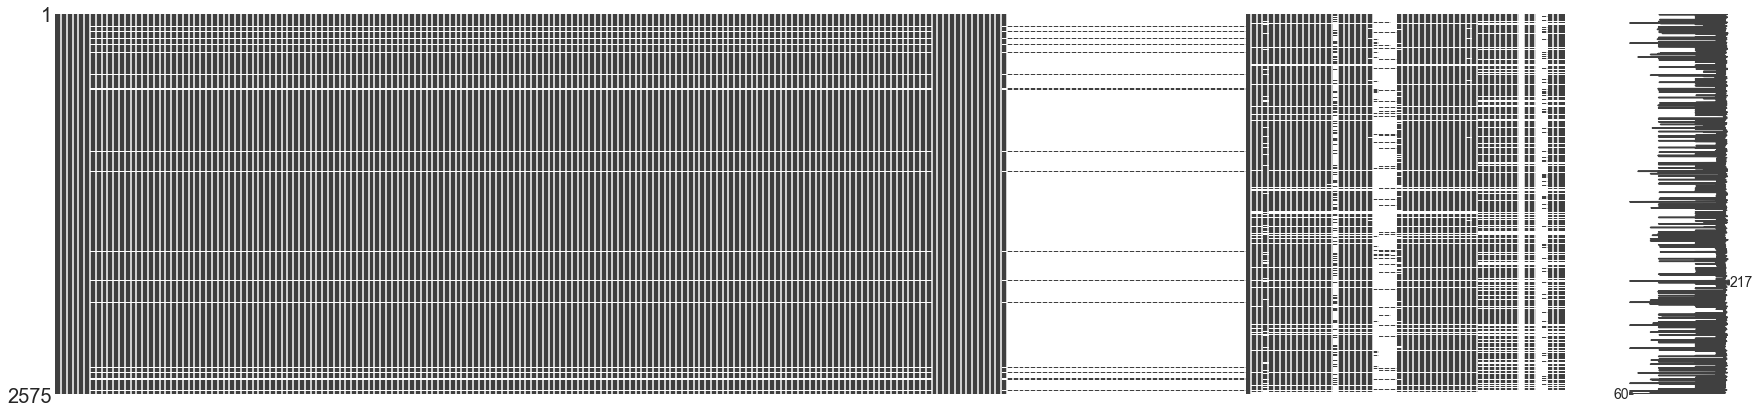

In [254]:
# Plot visualisation of the missing values for each feature of the DataFrame
msno.matrix(df_final_2021, figsize = (30, 7))

In [255]:
# Counts of missing values
null_value_stats = df_final_2021.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

games                                 155
games_starts                          155
minutes                               155
goals                                 155
assists                               155
                                     ... 
adj_current_gross_base_salary_gbp    2575
estimated_gross_total_gbp            2147
current_contract_status               566
current_contract_expiration           566
current_contract_length               566
Length: 241, dtype: int64

The visualisation shows us very quickly where the null values are. The first block of white is empty for goalkeeper statistics, which is the majority of the players.

We can also see that currently, the second block represents missing values for Capology data.

---

<a id='section5'></a>

## <a id='#section8'>8. Exporting the Engineered DataFrames</a>
Export the two datasets - Golden ID and the Final Player Valuation Dataset

In [256]:
# Export DataFrame as a CSV file

## Golden ID
df_golden_id_select.to_csv(data_dir + f'/export/' + f'golden_id.csv', index=None, header=True)

## Final Player Performance Valuation
df_final_2021.to_csv(data_dir + f'/export/' + f'player_performance_valuation_latest.csv', index=None, header=True)

## <a id='#section9'>9. Summary</a>
This notebook matches the scraped datasets from [FBref](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/),  through [record-linkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players performance statistics and financial valuations.

With this notebook we now have aggregated player performance data for players in the 'Big 5' European leagues for the 17/18-present seasons, along with their corresponding TransferMarkt valuations and contractual information.

## <a id='#section10'>10. Next Steps</a>
This data is now ready to be exported and analysed in further Jupyter notebooks or Tableau.

The Data Engineering subfolder in GitHub can be found [here](https://github.com/eddwebster/football_analytics/tree/master/notebooks/B\)%20Data%20Engineering) and a static version of the record linkage notebook in which the FBref data is joined to TransferMarkt data can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/B%29%20Data%20Engineering/Record%20Linkage%20of%20FBref%20and%20TransferMarkt%20Datasets.ipynb).

## <a id='#section11'>11. References</a>

#### Fuzzy Matching through Record Linkage
*    Record Linkage Wiki: https://en.wikipedia.org/wiki/Record_linkage
*    [Official Record Linkage documentation web](https://recordlinkage.readthedocs.io/en/latest/about.html)
*    [Official Record Linkage documentation PDF](https://readthedocs.org/projects/recordlinkage/downloads/pdf/stable/)
     -    [0. Preprocessing](https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html)
     -    [1. Indexing](https://recordlinkage.readthedocs.io/en/latest/ref-index.html)
     -    [2. Comparing](https://recordlinkage.readthedocs.io/en/latest/ref-compare.html)
     -    [3. Classification](https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html)
     -    [4. Evaluation](https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html)
*    Evaluation:https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html
*    Python Tools for Record Linking and Fuzzy Matching by Chris Moffitt: https://pbpython.com/record-linking.html
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    [Python Package Index (PyPI) Jellyfish library](https://pypi.org/project/jellyfish/).

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)